### Simple Linear Regression Example 3.1

In this example we assume that we know the *true* relationship between 
$X$ and $Y$, which is 
\begin{equation}
f(X) =2+3X 
\end{equation}

However, in practice we will never observe this perfect relationship, but 
\begin{equation}
Y=f(X)+\epsilon =2+3X +\epsilon
\end{equation}

We call $f(X)=2+3x$ the *population regression line*, which is the best linear approximation to the true relationship between $X$ and $Y$. If we now observe realizations of $X$ and $Y$, we can determine the *least squares line*
\begin{equation*}
Y=\beta_0 + \beta_1 X + \epsilon
\end{equation*}

by estimating $\beta_0$ and $\beta_1$ according to the equation. 

Let us simulate the observed data $X$ and $Y$  from the model
\begin{equation*}
Y=2+3X+\epsilon
\end{equation*}

where $ \epsilon $ is normally distributed with mean 0, thus $ \epsilon\sim\mathcal{N}(0,\sigma^{2}) $. We create 100 random values of $ X $, and generate 100 corresponding values of $Y$ from the model $Y=2+3X+\epsilon$

In [1]:
import numpy as np

n = 100  # number of datapoints

# crate data around y=ax+b
a, b = 3, 2
x = np.sort(np.random.uniform(low=-2, high=2, size=(n)))

y = b + a*x + np.random.normal(loc=0.0, scale=4, size=n)


x_true = np.linspace(-2, 2, n)
y_true = b + a*x_true

We can now plot a number of randomly generated datapoints and the found regression line. 

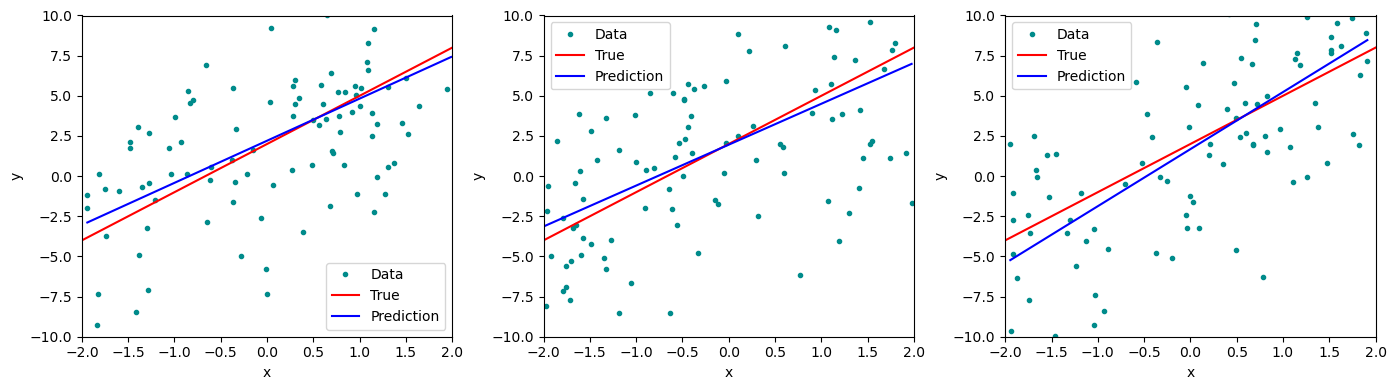

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create figure and plot
fig = plt.figure(figsize=(14, 4))
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    
    # Random data along known function:
    x = np.sort(np.random.uniform(low=-2, high=2, size=n))
    x_sm = sm.add_constant(x)
    y = 2 + 3*x + np.random.normal(loc=0.0, scale=4, size=n)
    # Linear Regression and prediction:
    model = sm.OLS(y, x_sm).fit()
    y_pred = model.predict(x_sm) # vorhersagen --> bsp. y vorhersagen wenn x gegeben 
    
    # Data points:
    plt.plot(x, y, marker='o', linestyle='None', 
             color='darkcyan', markersize='3', label="Data")
    # True line:
    plt.plot(x_true, y_true, 'r-', label="True")
    # Predicted line:
    plt.plot(x, y_pred, 'b-', label="Prediction")

    # Set labels and Legend
    ax.set_xlabel('x'), ax.set_ylabel('y')
    ax.set_xlim(-2, 2), ax.set_ylim(-10, 10)
    plt.legend()

plt.tight_layout()
plt.show()

In [4]:
x

array([-1.93577951, -1.89573602, -1.89191061, -1.86369689, -1.85970937,
       -1.8592768 , -1.79153203, -1.77473366, -1.75168457, -1.67957   ,
       -1.62558855, -1.58936742, -1.55614509, -1.54908321, -1.49731746,
       -1.4716893 , -1.45626192, -1.40157529, -1.39825357, -1.36365142,
       -1.31791488, -1.31161203, -1.26957538, -1.23405961, -1.22240012,
       -1.13705204, -1.08500223, -1.06647958, -1.04274621, -0.97810998,
       -0.97515842, -0.96339718, -0.9616574 , -0.93782519, -0.90741901,
       -0.88089452, -0.8769871 , -0.81483603, -0.81306851, -0.7812422 ,
       -0.76301682, -0.73184887, -0.726094  , -0.71374558, -0.66602358,
       -0.63122824, -0.60505598, -0.52237682, -0.51517925, -0.4999882 ,
       -0.48673845, -0.43318808, -0.30781615, -0.19389417, -0.1801351 ,
       -0.13587681, -0.0870535 , -0.08026053,  0.02520173,  0.09606182,
        0.12174879,  0.14314485,  0.18912665,  0.19607347,  0.21235168,
        0.32227307,  0.35168744,  0.40978332,  0.41344453,  0.44

In [6]:
x_sm

array([[ 1.        , -1.94519962],
       [ 1.        , -1.93975373],
       [ 1.        , -1.92453053],
       [ 1.        , -1.91759627],
       [ 1.        , -1.91643387],
       [ 1.        , -1.91255409],
       [ 1.        , -1.87601489],
       [ 1.        , -1.75783255],
       [ 1.        , -1.75724331],
       [ 1.        , -1.74825955],
       [ 1.        , -1.72714969],
       [ 1.        , -1.68942225],
       [ 1.        , -1.66696971],
       [ 1.        , -1.65768982],
       [ 1.        , -1.55273382],
       [ 1.        , -1.52554734],
       [ 1.        , -1.46259775],
       [ 1.        , -1.45209075],
       [ 1.        , -1.33681703],
       [ 1.        , -1.30461187],
       [ 1.        , -1.2372197 ],
       [ 1.        , -1.182036  ],
       [ 1.        , -1.13242169],
       [ 1.        , -1.04480426],
       [ 1.        , -1.04220454],
       [ 1.        , -1.03121166],
       [ 1.        , -0.93311038],
       [ 1.        , -0.88609108],
       [ 1.        ,

The red line represents the plot of the function  $ f(X)=2+3X $, which remains identical in all three simulations. The blue line is the least squares line that was constructed by means of the least squares estimates for the simulated data.  Each least squares line is different, but on average, the least squares lines are quite close to the population regression line.

In the next figure we have generated ten different data sets from the model given by $Y  = 2+3X +\epsilon$ and plotted the corresponding ten least squares lines. Notice that different data sets generated from the same true model result in slightly different least squares lines, but the unobserved population regression line does not change. 

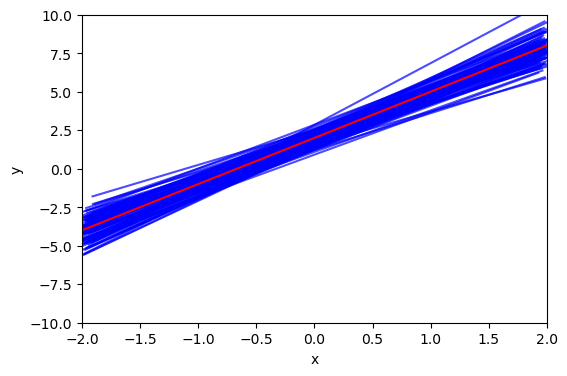

In [3]:
n_lines = 100 # number of iterations

# Create figure and plot
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1, 1, 1)

for i in range(n_lines):
    # Random data allong known function:
    x = np.sort(np.random.uniform(low=-2, high=2, size=n))
    x_sm = sm.add_constant(x)
    y = 2 + 3*x + np.random.normal(loc=0.0, scale=4, size=n)
    # Linear Regression and prediction:
    model = sm.OLS(y, x_sm).fit()
    y_pred = model.predict(x_sm)

    # Predicted line:
    plt.plot(x, y_pred, 'b-', alpha=0.7)
# True line:
plt.plot(x_true, y_true, 'r-', label="True")
# Set labels and Legend
ax.set_xlabel('x'), ax.set_ylabel('y')
ax.set_xlim(-2, 2), ax.set_ylim(-10, 10)

plt.show()